In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 27

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/39 ━━━━━━━━━━━━━━━━━━━━ 25s 682ms/step - accuracy: 0.0000e+00 - loss: 3.4921
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0249 - loss: 3.3879 - val_accuracy: 0.0778 - val_loss: 3.2732
Epoch 2/1000
 1/39 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0547 - loss: 3.2791
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0737 - loss: 3.2775 - val_accuracy: 0.1398 - val_loss: 3.2221
Epoch 3/1000
 1/39 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1016 - loss: 3.2176
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0936 - loss: 3.2107 - val_accuracy: 0.1593 - val_loss: 3.1319
Epoch 4/1000
 1/39 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0938 - loss: 3.1995
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7436 - loss: 0.9117 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[1.2241387e-04 1.1117164e-03 3.6810857e-04 2.4959156e-01 1.5303377e-02
 2.6080228e-04 1.5266435e-01 3.6536228e-02 8.1643220e-10 7.1602600e-04
 3.1223027e-02 8.2574995e-11 2.7878545e-05 8.8060900e-05 6.3704744e-09
 4.3909377e-01 1.7606899e-08 6.0717872e-12 1.6780614e-05 3.8606454e-02
 1.5096450e-11 4.4544000e-11 3.1112122e-13 8.5729817e-03 8.8901209e-10
 2.5696347e-02 4.4748784e-08]
15


# Confusion matrix

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


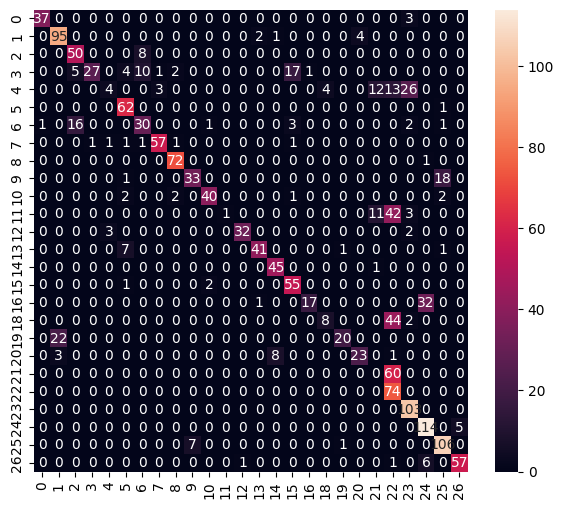

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.79      0.93      0.86       102
           2       0.70      0.86      0.78        58
           3       0.96      0.40      0.57        67
           4       0.50      0.06      0.11        62
           5       0.79      0.98      0.88        63
           6       0.61      0.56      0.58        54
           7       0.93      0.90      0.92        63
           8       0.94      0.99      0.96        73
           9       0.82      0.63      0.72        52
          10       0.93      0.85      0.89        47
          11       1.00      0.02      0.03        57
          12       0.97      0.86      0.91        37
          13       0.93      0.82      0.87        50
          14       0.83      0.98      0.90        46
          15       0.71      0.95      0.81        58
          16       0.94      0.34      0.50        50
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Alvaro\AppData\Local\Temp\tmp1utmyhp5\assets


INFO:tensorflow:Assets written to: C:\Users\Alvaro\AppData\Local\Temp\tmp1utmyhp5\assets


Saved artifact at 'C:\Users\Alvaro\AppData\Local\Temp\tmp1utmyhp5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2028529860688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2028529869712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2028529862416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2028529868944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2027712738128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2027712736784: TensorSpec(shape=(), dtype=tf.resource, name=None)


7568

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2241417e-04 1.1117180e-03 3.6810877e-04 2.4959135e-01 1.5303379e-02
 2.6080242e-04 1.5266430e-01 3.6536250e-02 8.1643420e-10 7.1602565e-04
 3.1222997e-02 8.2575356e-11 2.7878586e-05 8.8061031e-05 6.3704779e-09
 4.3909401e-01 1.7606908e-08 6.0718136e-12 1.6780637e-05 3.8606465e-02
 1.5096514e-11 4.4544108e-11 3.1112195e-13 8.5729947e-03 8.8901586e-10
 2.5696330e-02 4.4748806e-08]
15
